# Problem Statement

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing Requried Library

In [1]:
#Hr_Attrition.csv

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [107]:
df=pd.read_csv("Hr_Attrition.csv")
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
## Checking shape of Dataset
df.shape

(1470, 35)

1-We have 1470 rows and 35 column including target Attribute.

2-Attrition is our Target Attribute.

In [7]:
## Checking Datatype
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

1-We can see that in our dataset 9 attributes have Object data Type and 24 attribute have integer datatype.

1-All datatype of our attributes are ok.

In [8]:
## Checking Null Values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:title={'center':'NUll values'}>

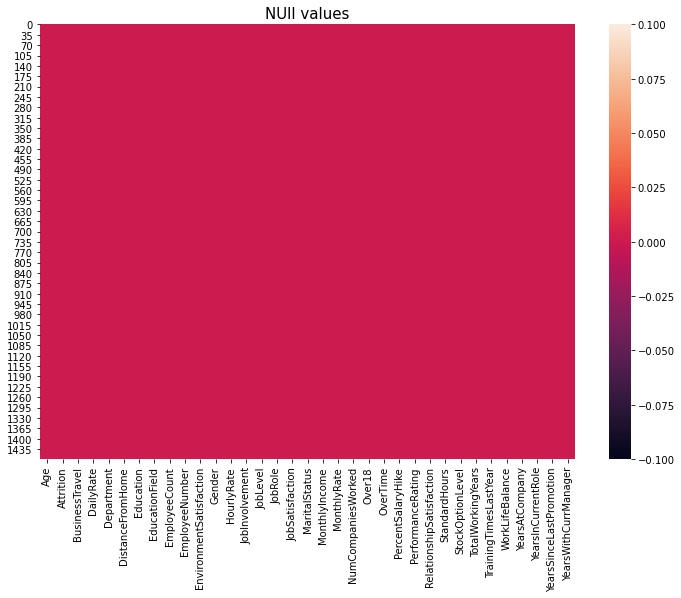

In [10]:
plt.figure(figsize=(12,8))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull())

Observation:

1- There is no missing values present in our dataset.

In [12]:
## Statistical Summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observation:

1-We can observe that MOnthly Income, MOnthly rate are Right skewed because Mean values is greater than the Median Values.

2- We can observe that for most of attribute the median values(50%) is near to it's mean value which shows that data is normally distributed.

3-In some columns such as StandardHours,EmployeeCount only single number is repeated, Means there is a constant values present which has no significance.

4- In columns such as StockOptionLevel, TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole.YearsSinceLastPromotion,YearsWithCurrManager have the minimun values is Zero which shows that some new joining/Recent joining are also present in our Dataset.

# ANALYSIS OF THE FEATURE NAMES

Removing Useless Features

1-StandardHours

2-EmployeeCount

3-Over18

4-EmployeeNumber

5-StockOptionLevel

In [13]:
# Drop useless features - StandardHours,EmployeeCount,Over18,EmployeeNumber,StockOptionLevel
df = df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,6,3,3,2,2,2,2


Reason:

1-We have drop EmployeeCount,StandardHours because it has only one unique values.

2-we have drop EmployeeCount,EmployeeNumber because it is just a counting number of employees , it has no significance for checking Attrition

# Analysis of the Rating Features

JobSatisfaction

EnvironmentSatisfaction

RelationshipSatisfaction

JobInvolvement

WorkLifeBalance

PerformanceRating

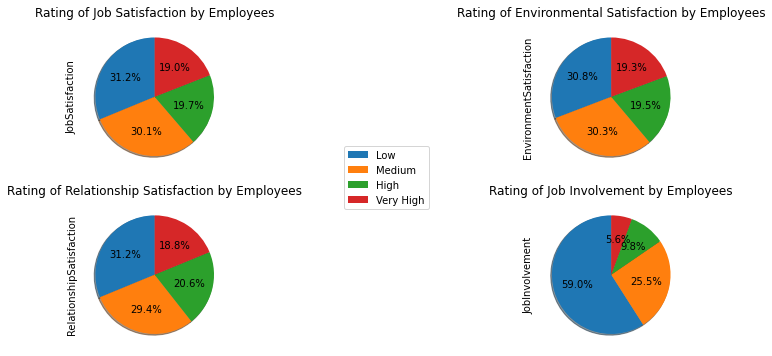

In [16]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

Observation:
    
From the subplot, we can infer that more than 60% of the employees are :

1-Not Satisfied in their Job

2-Not Satisfied with their Work Environmnet

3-Not Satisfied in their Relationship

4-Not Getting involved in their job

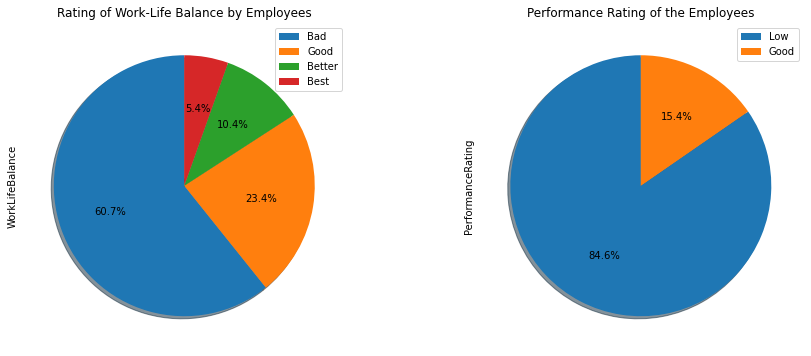

In [18]:
fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
ax6 = fig2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Excellent','Outstanding'

df['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')




df['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

Observation:
From the above piecharts, we can see that:

1-Almost 60% of the employees have rated their Work-life Balance as Bad.

2-Almost 85% of the employees have a low performance rating.

# Analysis of Business Travel Feature

<AxesSubplot:title={'center':'BusinessTravel vs Attrition'}, xlabel='BusinessTravel', ylabel='count'>

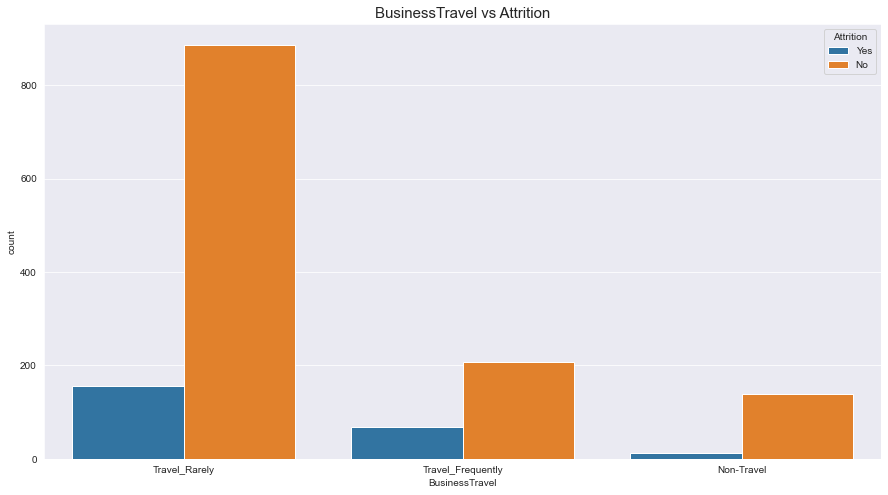

In [19]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('BusinessTravel vs Attrition',fontsize=15)
sns.countplot(df['BusinessTravel'],hue='Attrition',data=df)

Observation:

From the above data it is clear that Employees who travel rarely have more attrition rate followed by Employees who travel frequently

Best way to reduce this attrition is to conduct monthly survey and to assign travel according to the Employees' business travel interest

<AxesSubplot:title={'center':'Years In CurrentRole  vs Attrition'}, xlabel='YearsInCurrentRole', ylabel='count'>

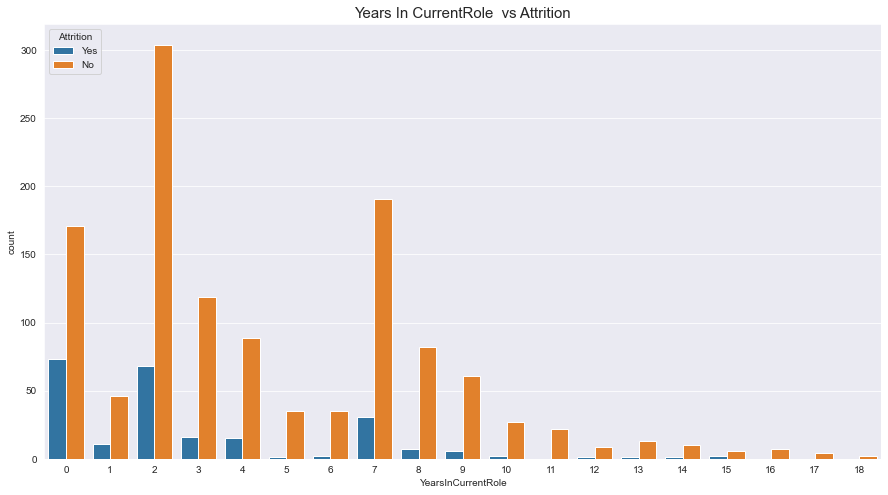

In [21]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Years In CurrentRole  vs Attrition',fontsize=15)
sns.countplot(df['YearsInCurrentRole'],hue='Attrition',data=df)

It is observed that the newly arriving employees quit their jobs most,so more concern should be given to the freshers and their cause of leaving the company should be figured out

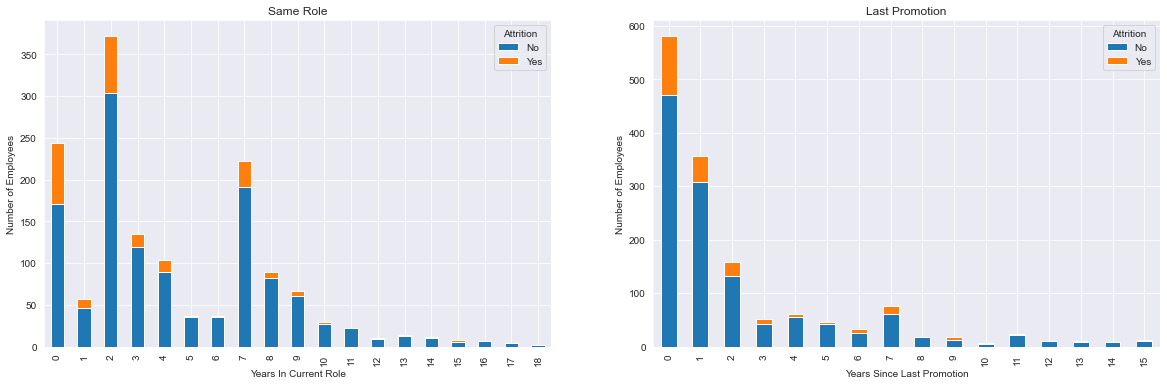

In [22]:
ycr = df.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = df.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()

From the above two plots, it is very clear that Employees who are in same post or not getting promoted tend to leave the company most. It is a major concern, since experienced Employees quiting their jobs would affect the company most.

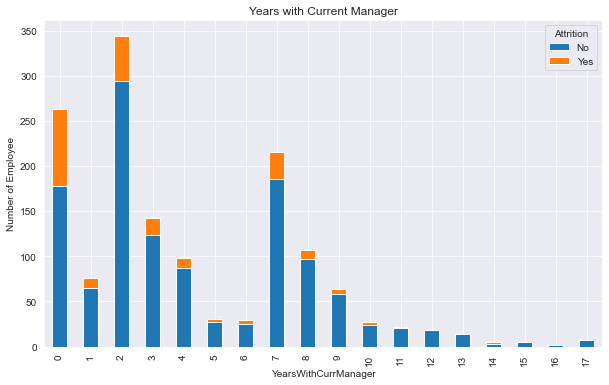

In [24]:
ycm = df.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

ycm.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

It is clear that in the starting of relation of Manager and Employee's are not so happy. It is important that the Manager communication with the employee from the starting itself trying to understand them soon to reduce the increase in Attrition.

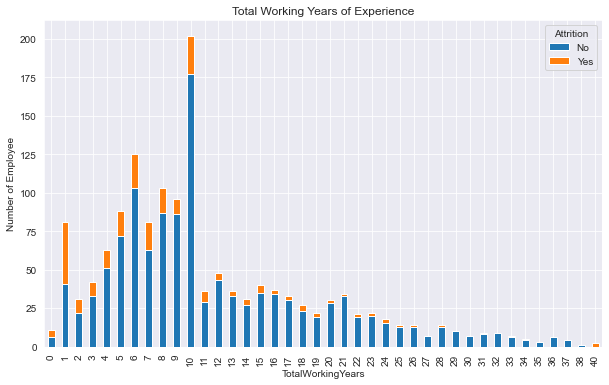

In [109]:
twy = df.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

twy.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()

1-Interesting fact here we can see in our data that an employee who has worked 5 years in company, they has heighest chances to left the comapany.

2-Additionally,employee who has worked only 1 year in company has also the sencond most tenedency for job change.so it's important that company creates a new policy to handle freshers so they don't leave the company from the start

In [28]:
mi = df[df['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = df[df['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()

,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


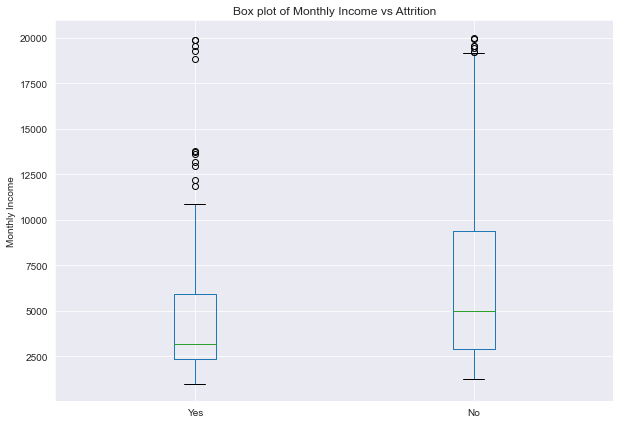

In [29]:
mi.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

Employees who left their jobs tend to have low average monthly income than those who continued their job in the company.

<AxesSubplot:title={'center':'Overtime vs Attrition Relation'}, xlabel='OverTime', ylabel='count'>

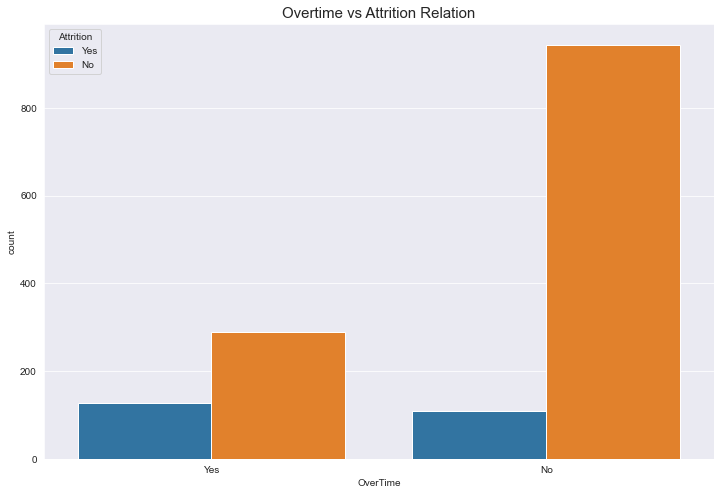

In [30]:
plt.figure(figsize=(12,8))
plt.title('Overtime vs Attrition Relation',fontsize=15)
sns.countplot(df['OverTime'],hue='Attrition',data=df)

1-we can see that people who do over time have higher chances to left the company as compair to person who don't do overtime.

# DISTRIBUTION OF EMPLOYEE ATTRITION IN THE COMPANY

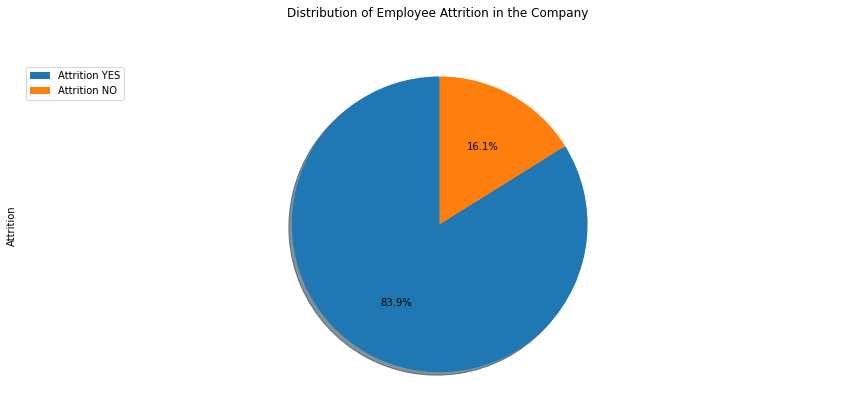

In [11]:
labels = 'Attrition YES','Attrition NO'
df['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

From the Pie Chart, we can infer that out of 1470 employees, 16% of the employees left their job due to some reasons whereas other 84% of the employees preferred to continue their job at the company.

<AxesSubplot:title={'center':'Department vs Attrition'}, xlabel='Department', ylabel='count'>

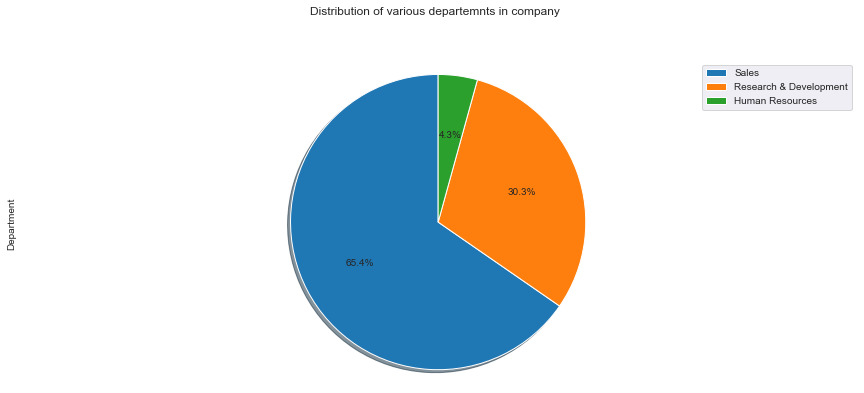

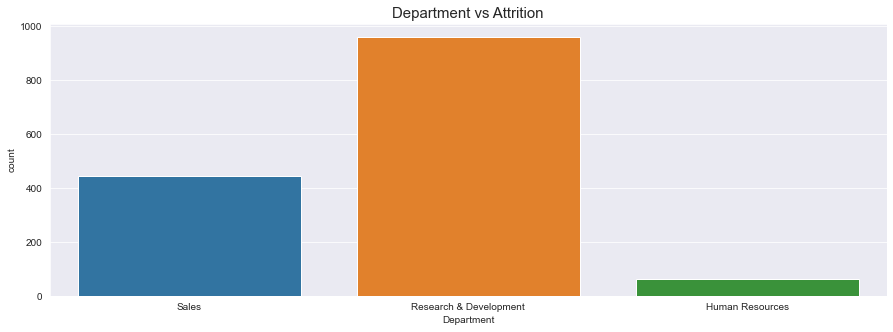

In [44]:
df['Department'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.title('Distribution of various departemnts in company  ',fontsize=12 ,y=1.12) 
plt.legend(labels=df['Department'].unique(), loc='upper right')

plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.title('Department vs Attrition',fontsize=15)
sns.countplot(df['Department'],data=df[df['Attrition']=='Yes'])


Observation:
    
1-We can see that people who works in Research & development have higher chances to leave the company.

2-HR department people have least chances to job change.

<AxesSubplot:title={'center':'Gender vs Attrition'}, xlabel='Gender', ylabel='count'>

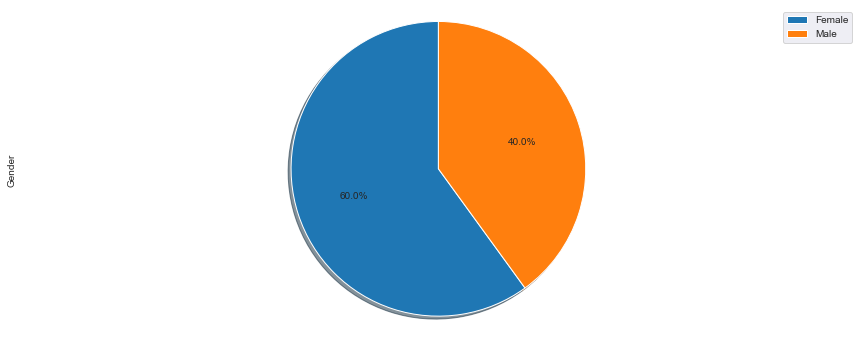

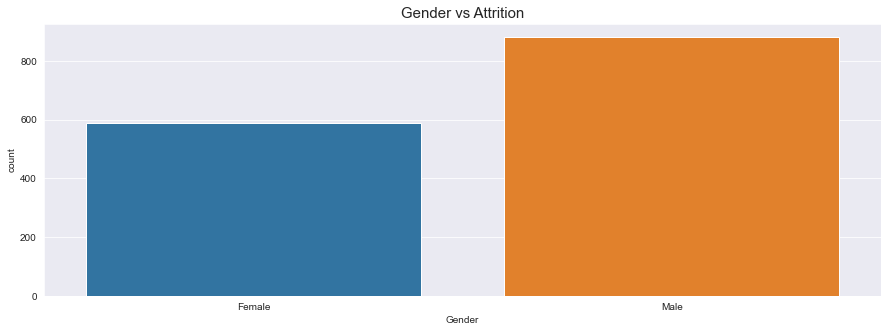

In [45]:
df['Gender'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=df['Gender'].unique(), loc='upper right')

plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.title('Gender vs Attrition',fontsize=15)
sns.countplot(df["Gender"],data=df[df['Attrition']=='Yes'])

Observation:
    
1-we can observe from above that male has higher chances to change job as compaired to Female.

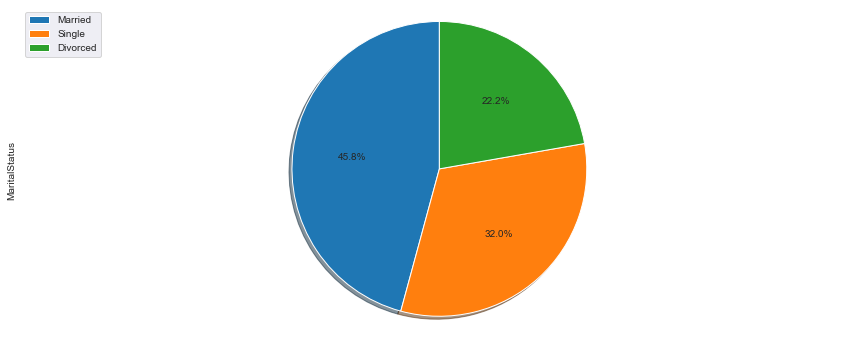

In [46]:
df['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left')

In [47]:
msa = df.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
msa = msa.transpose()
msa

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


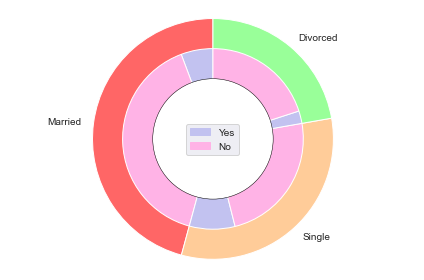

In [48]:
labels = ['Married', 'Single', 'Divorced']
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [84,589,120,350,33,294]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

Observation:

1- We could see clearly that unmarried people have higher chances to leave company.

2- Divorced people shows very less tendency to switch job more frequently.

<AxesSubplot:title={'center':'EducationField vs Attrition Relation'}, xlabel='EducationField', ylabel='count'>

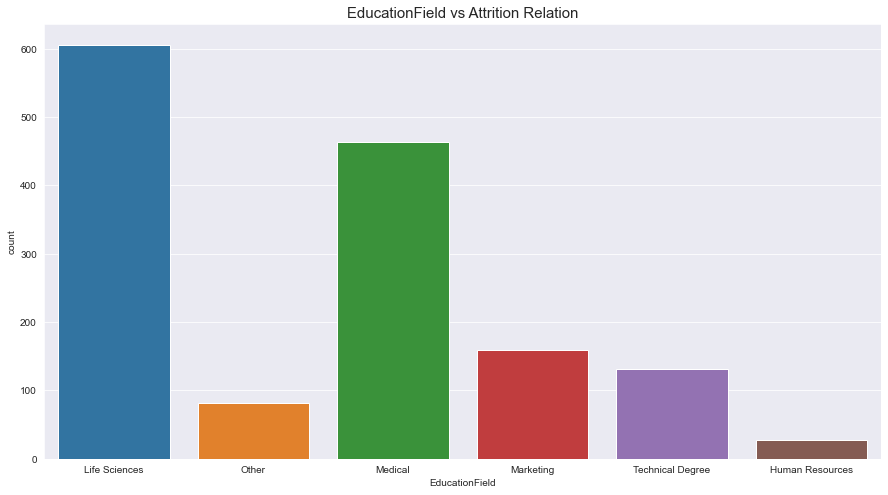

In [51]:
plt.figure(figsize=(15,8))
plt.title('EducationField vs Attrition Relation',fontsize=15)
sns.countplot(df['EducationField'],data=df[df['Attrition']=='Yes'])

Observation:

1-We can see that life science and Medical two major Education fields which has higher demand in market and people are switch their job more frequent.

<Figure size 1080x576 with 0 Axes>

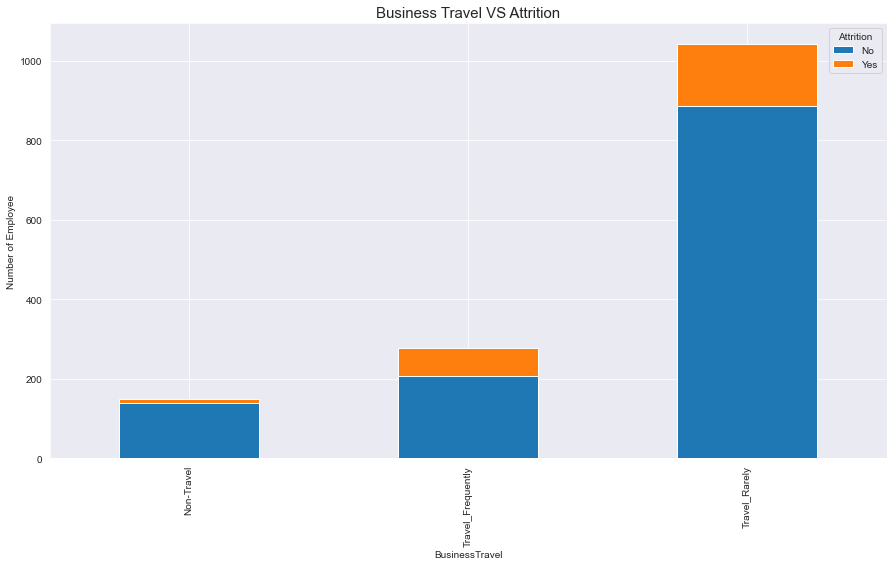

In [57]:
plt.figure(figsize=(15,8))
props = df.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar', alpha=1, stacked='False',figsize=(15,8))
plt.title('Business Travel VS Attrition',fontsize=15)
plt.ylabel('Number of Employee')
plt.show()

Observation:

From the above data it is clear that Employees who travel rarely have more attrition rate followed by Employees who travel frequently

Best way to reduce this attrition is to conduct monthly survey and to assign travel according to the Employees' business travel interest.

<Figure size 1080x576 with 0 Axes>

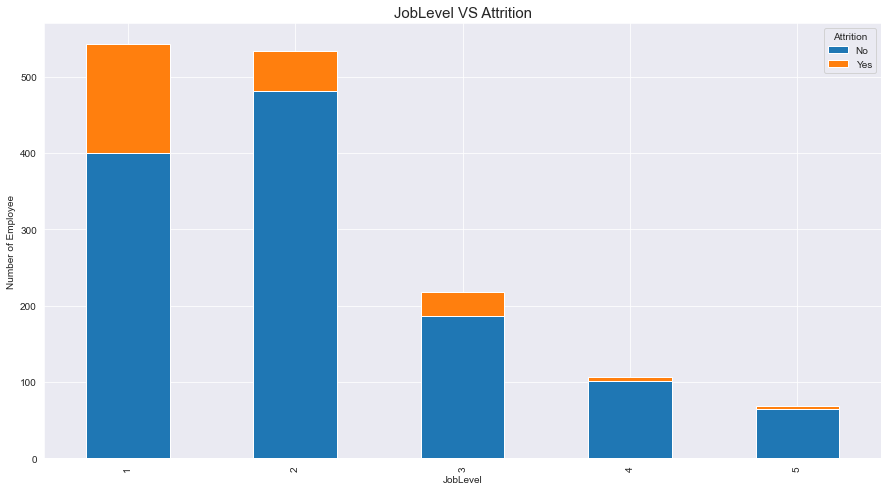

In [59]:
plt.figure(figsize=(15,8))
job = df.groupby("JobLevel")['Attrition'].value_counts(normalize=False).unstack()

job.plot(kind='bar', alpha=1, stacked='False',figsize=(15,8))
plt.title('JobLevel VS Attrition',fontsize=15)
plt.ylabel('Number of Employee')
plt.show()

Observation:

1- we can see employee who has job band/level 1 or 2 have tendency to change job more frequent then job level 4 or 5.

<Figure size 1080x576 with 0 Axes>

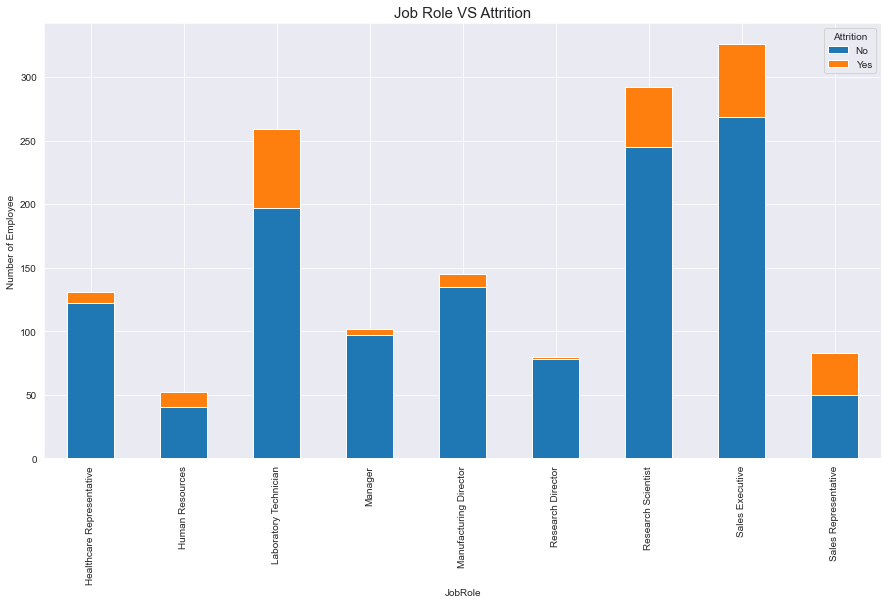

In [60]:
plt.figure(figsize=(15,8))
job_role = df.groupby("JobRole")['Attrition'].value_counts(normalize=False).unstack()

job_role.plot(kind='bar', alpha=1, stacked='False',figsize=(15,8))
plt.title('Job Role VS Attrition',fontsize=15)
plt.ylabel('Number of Employee')
plt.show()

Observation:

1-Laboratory Technician ,Sales Executive, Sales representatives research scientis have higher tendency to leave job in this company.

2- There are higher job change rate in Sales department, Most of sales representative seems to change job.

# Data Distribution

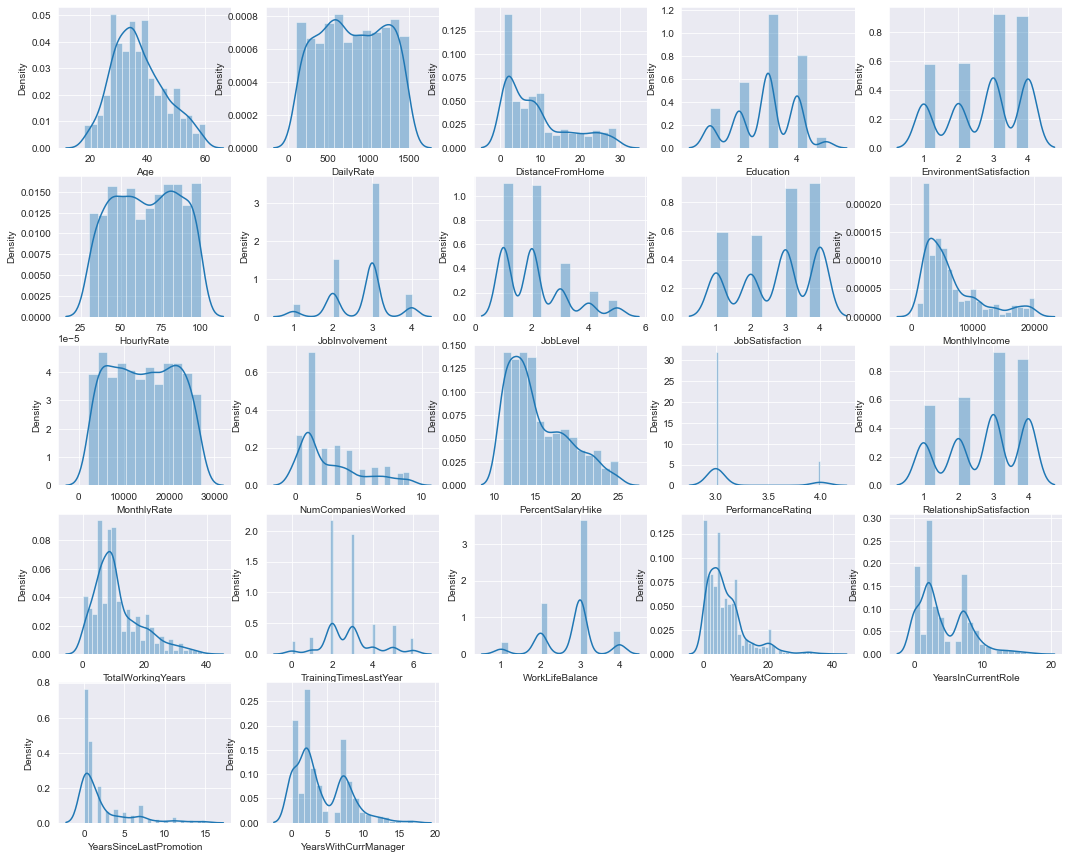

In [62]:
di=df.select_dtypes(exclude='object')
plt.figure(figsize=(18,15))
plot=1
for col in di:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

Observation

1- Most of our data is Normally distributed.

2- Attributes like Total working years,Yearsatcompany, Years since last promotion etc. are right skewed.

3-This shows some outliers must be present in our dataset.

4- we will remove skewness by some trasformation methods.

# Outliers Detection

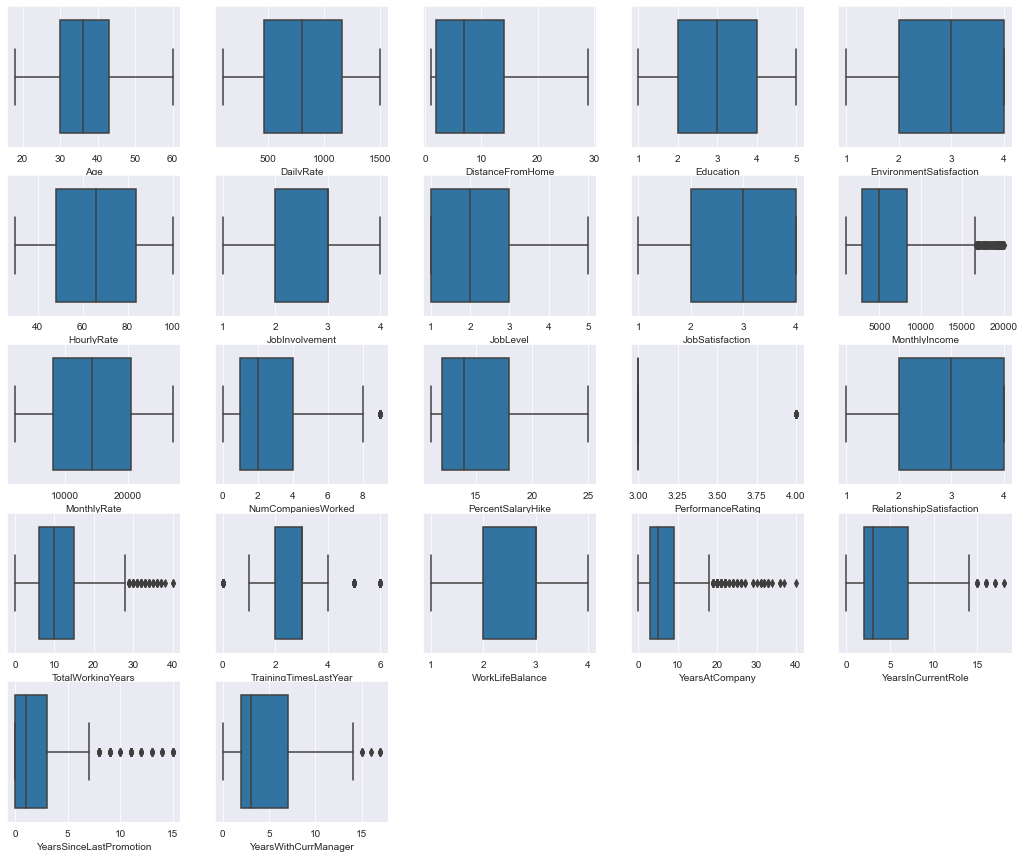

In [64]:
plt.figure(figsize=(18,15))
plot=1
for col in di:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

# Removing Outliers

In [65]:
## Removing Outliers
## Removing Outliers
from scipy.stats import zscore
z =np.abs(zscore(di))
print(z.shape)
df = df.loc[(z<3).all(axis=1)]
print(df.shape)

(1470, 22)
(1387, 30)


# Checking skewness

In [66]:
df.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [67]:
for i in di:
    if df[i].skew()>.55:
        df[i]=np.log1p(df[i])

In [68]:
df.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.031570
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobSatisfaction            -0.345612
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
YearsAtCompany             -0.379527
YearsInCurrentRole         -0.390406
YearsSinceLastPromotion     0.695348
YearsWithCurrManager       -0.347018
dtype: float64

Observation:
    
1-We have removed skewness to the possible extent.

# Encoding of categorical Columns

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ob=df.select_dtypes(include='object')
for col in ob:
    df[col]=le.fit_transform(df[col])

In [70]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,0.693147,2,1,2,0,94,3,1.098612,7,4,2,8.698514,19479,2.197225,1,2.484907,1.386294,1,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,0,1,279,1,2.197225,1,1,3,1,61,2,1.098612,6,2,1,8.543056,24907,0.693147,0,3.178054,1.609438,4,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,1,2,1373,1,1.098612,2,4,4,1,92,2,0.693147,2,3,2,7.645398,2396,1.945910,1,2.772589,1.386294,2,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,0,1,1392,1,1.386294,4,1,4,0,56,3,0.693147,6,3,1,7.975908,23159,0.693147,1,2.484907,1.386294,3,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,0,2,591,1,1.098612,1,3,1,1,40,3,0.693147,2,2,1,8.151622,16632,2.302585,0,2.564949,1.386294,4,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612


# Splitting Data into Input and Output Variable

In [71]:
x=df.drop(['Attrition'],axis=1)
y=df[['Attrition']]

In [72]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,0.693147,2,1,2,0,94,3,1.098612,7,4,2,8.698514,19479,2.197225,1,2.484907,1.386294,1,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1,279,1,2.197225,1,1,3,1,61,2,1.098612,6,2,1,8.543056,24907,0.693147,0,3.178054,1.609438,4,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,2,1373,1,1.098612,2,4,4,1,92,2,0.693147,2,3,2,7.645398,2396,1.945910,1,2.772589,1.386294,2,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.386294,4,1,4,0,56,3,0.693147,6,3,1,7.975908,23159,0.693147,1,2.484907,1.386294,3,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,2,591,1,1.098612,1,3,1,1,40,3,0.693147,2,2,1,8.151622,16632,2.302585,0,2.564949,1.386294,4,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,3.178054,2,3,3,1,41,4,1.098612,2,4,1,7.852439,12290,1.609438,0,2.890372,1.386294,3,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294
1466,39,2,613,1,1.945910,1,3,4,1,42,2,1.386294,0,1,1,9.209540,21457,1.609438,0,2.772589,1.386294,1,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442
1467,27,2,155,1,1.609438,3,1,2,1,87,4,1.098612,4,2,1,8.723069,5174,0.693147,1,3.044522,1.609438,2,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294
1468,49,1,1023,2,1.098612,3,3,4,1,63,2,1.098612,7,2,1,8.592486,13243,1.098612,0,2.708050,1.386294,4,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225


In [73]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.502086,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,0.376231,0.212494,1.007448,1.143776,1.231027,0.320432,0.734688,1.663023,1.584737,-1.303793,-0.424765,-1.575817,-0.052493,-3.388651,-2.501172,0.297751,0.372567,-0.964086,0.628647
1,1.442111,-0.905354,-1.307769,-0.496337,0.253886,-1.853858,-0.940815,0.251978,0.813067,-0.239091,-1.034126,0.212494,0.604178,-0.673426,-0.141509,0.073994,1.505353,-0.578551,-0.631019,1.952651,2.354241,1.199034,0.247982,0.302431,0.336558,0.939176,0.980909,-0.028096,0.993844
2,0.083966,0.593126,1.406752,-0.496337,-1.028716,-0.876177,1.305159,1.169285,0.813067,1.290017,-1.034126,-1.066050,-1.008901,0.235175,1.231027,-1.349001,-1.690747,1.288481,1.584737,0.047753,-0.424765,-0.650866,-0.228855,0.302431,0.336558,-2.463747,-1.710586,-0.964086,-1.645896
3,-0.368749,-0.905354,1.453896,-0.496337,-0.692855,1.079185,-0.940815,1.169285,-1.229911,-0.485721,0.376231,-1.066050,0.604178,0.235175,-0.141509,-0.825065,1.257173,-0.578551,1.584737,-1.303793,-0.424765,0.274084,-0.052493,0.302431,0.336558,0.654398,0.980909,0.907895,-1.645896
4,-1.047821,0.593126,-0.533609,-0.496337,-1.028716,-1.853858,0.556501,-1.582635,0.813067,-1.274939,0.376231,-1.066050,-1.008901,-0.673426,-0.141509,-0.546519,0.330473,1.820046,-0.631019,-0.927748,-0.424765,1.199034,-0.428798,0.302431,0.336558,-0.904674,-0.288613,0.519424,-0.251267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.193406,-0.496337,1.398978,-0.876177,0.556501,0.251978,0.813067,-1.225613,1.786588,0.212494,-1.008901,1.143776,-0.141509,-1.020793,-0.286002,0.787026,-0.631019,0.601105,-0.424765,0.274084,0.985391,0.302431,0.336558,0.078991,-0.288613,-0.964086,0.113930
1383,0.310324,0.593126,-0.479021,-0.496337,-0.039518,-1.853858,0.556501,1.169285,0.813067,-1.176286,-1.034126,1.119635,-1.815441,-1.582027,-0.141509,1.130526,1.015523,0.787026,-0.631019,0.047753,-0.424765,-1.575817,0.105269,1.382003,0.336558,0.487249,0.980909,-0.028096,0.993844
1384,-1.047821,0.593126,-1.615447,-0.496337,-0.432340,0.101504,-0.940815,-0.665328,0.813067,1.043387,1.786588,0.212494,-0.202362,-0.673426,-0.141509,0.359356,-1.296328,-0.578551,1.584737,1.325313,2.354241,-0.650866,-0.428798,-3.388651,0.336558,0.297751,-0.288613,-0.964086,0.113930
1385,1.442111,-0.905354,0.538304,1.405373,-1.028716,0.101504,0.556501,1.169285,0.813067,-0.140439,-1.034126,0.212494,1.007448,-0.673426,-0.141509,0.152353,-0.150696,0.025726,-0.631019,-0.255452,-0.424765,1.199034,0.985391,0.302431,-1.082307,0.803919,0.808075,-0.964086,1.143363


# Feature Importance

[0.04303944 0.02625675 0.03357752 0.02524642 0.03963955 0.02733556
 0.0307702  0.03860197 0.02317454 0.0331317  0.03337363 0.03375
 0.03358459 0.03811859 0.03932074 0.04538608 0.03157666 0.03239791
 0.07037878 0.03150363 0.01359232 0.03298554 0.04662363 0.03160083
 0.03373439 0.03416674 0.03224363 0.02716471 0.03772395]


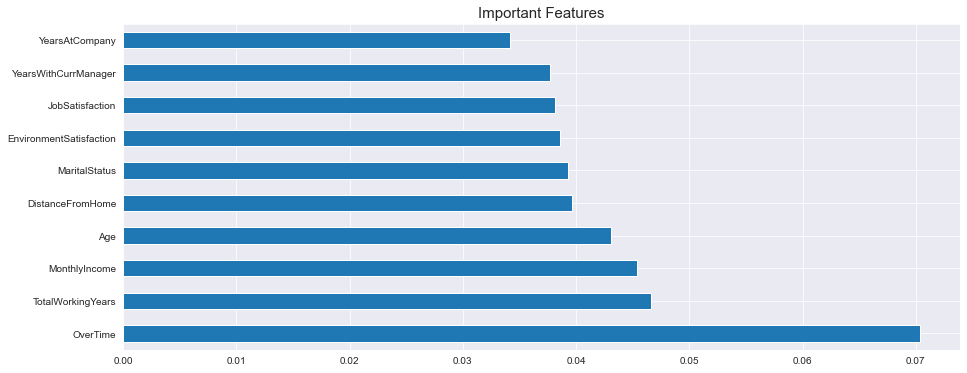

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)
print(extra.feature_importances_)


plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

Observation:

1-We can see that over time , age and Monthly Income are 3 major attributed which decide whether employee will leave or Not.

# Model Building

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.combine import SMOTEENN

In [79]:
## Over sampling our data
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [80]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(X_resampled1,y_resampled1,test_size=.20,random_state=i,stratify=y_resampled1)
    ##over sampling of our Data
       # print(x_train.shape,y_train.shape) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

max accuracy score corresponding to 64 is 0.9109792284866469


cross validation score 0.8767186972443707


Standard Deviation 0.004609628718217273


F1 score 0.9102564102564102


Training accuracy 0.879080118694362


Test Accuracy 0.8753709198813057


Confusion Matrix [[ 82  28]
 [ 14 213]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.75      0.80       110
           1       0.88      0.94      0.91       227

    accuracy                           0.88       337
   macro avg       0.87      0.84      0.85       337
weighted avg       0.87      0.88      0.87       337



Roc_auc Score 0.8418902683219864





64

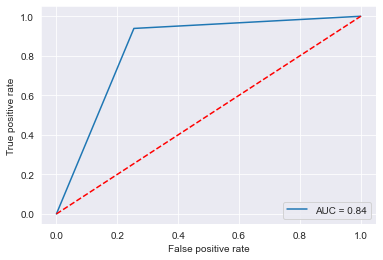

In [81]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

max accuracy score corresponding to 81 is 0.9169139465875371


cross validation score 0.7829623665688389


Standard Deviation 0.018593366338512836


F1 score 0.9129511677282377


Training accuracy 1.0


Test Accuracy 0.8783382789317508


Confusion Matrix [[ 81  29]
 [ 12 215]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.74      0.80       110
           1       0.88      0.95      0.91       227

    accuracy                           0.88       337
   macro avg       0.88      0.84      0.86       337
weighted avg       0.88      0.88      0.88       337



Roc_auc Score 0.8417501001201441





81

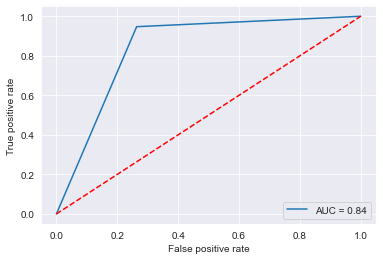

In [82]:
## DEcision Tree
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max accuracy score corresponding to 98 is 0.9406528189910979


cross validation score 0.8457159182401371


Standard Deviation 0.008853285268871499


F1 score 0.9399585921325052


Training accuracy 0.9540059347181009


Test Accuracy 0.913946587537092


Confusion Matrix [[ 81  29]
 [  0 227]]


Classification Report               precision    recall  f1-score   support

           0       1.00      0.74      0.85       110
           1       0.89      1.00      0.94       227

    accuracy                           0.91       337
   macro avg       0.94      0.87      0.89       337
weighted avg       0.92      0.91      0.91       337



Roc_auc Score 0.8681818181818182





98

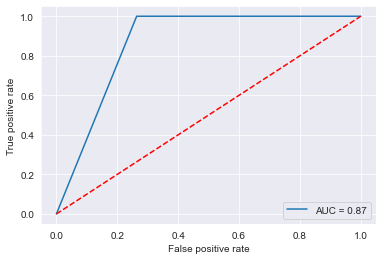

In [83]:
## KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max accuracy score corresponding to 45 is 0.827893175074184


cross validation score 0.8139911175752538


Standard Deviation 0.015185917403600356


F1 score 0.8318181818181818


Training accuracy 0.8011869436201781


Test Accuracy 0.7804154302670623


Confusion Matrix [[ 80  30]
 [ 44 183]]


Classification Report               precision    recall  f1-score   support

           0       0.65      0.73      0.68       110
           1       0.86      0.81      0.83       227

    accuracy                           0.78       337
   macro avg       0.75      0.77      0.76       337
weighted avg       0.79      0.78      0.78       337



Roc_auc Score 0.7667200640768923





45

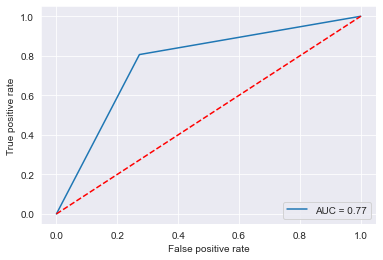

In [84]:
##Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max accuracy score corresponding to 72 is 0.9821958456973294


cross validation score 0.8565254655481391


Standard Deviation 0.006566613851170658


F1 score 0.962800875273523


Training accuracy 1.0


Test Accuracy 0.9495548961424333


Confusion Matrix [[100  10]
 [  7 220]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.96      0.97      0.96       227

    accuracy                           0.95       337
   macro avg       0.95      0.94      0.94       337
weighted avg       0.95      0.95      0.95       337



Roc_auc Score 0.9391269523428113





72

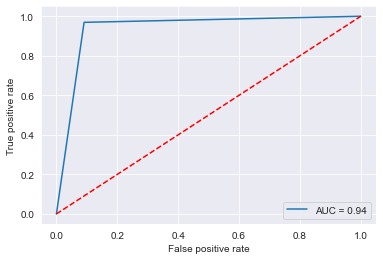

In [85]:
#Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max accuracy score corresponding to 79 is 0.9554896142433235


cross validation score 0.8702256966989586


Standard Deviation 0.010900154442479961


F1 score 0.9444444444444444


Training accuracy 0.9532640949554896


Test Accuracy 0.9228486646884273


Confusion Matrix [[ 90  20]
 [  6 221]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.82      0.87       110
           1       0.92      0.97      0.94       227

    accuracy                           0.92       337
   macro avg       0.93      0.90      0.91       337
weighted avg       0.92      0.92      0.92       337



Roc_auc Score 0.8958750500600721





79

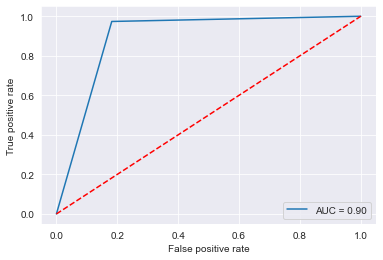

In [86]:
## adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max accuracy score corresponding to 86 is 0.9614243323442137


cross validation score 0.8608627899124743


Standard Deviation 0.010179330571126743


F1 score 0.9546436285097192


Training accuracy 0.9933234421364985


Test Accuracy 0.9376854599406528


Confusion Matrix [[ 95  15]
 [  6 221]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.86      0.90       110
           1       0.94      0.97      0.95       227

    accuracy                           0.94       337
   macro avg       0.94      0.92      0.93       337
weighted avg       0.94      0.94      0.94       337



Roc_auc Score 0.9186023227873448





86

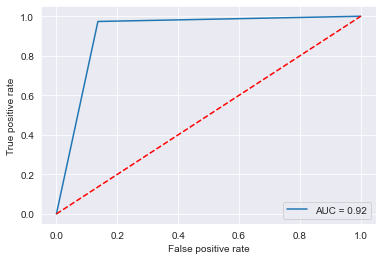

In [87]:
## Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

In [88]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','KNN','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
                         'Accuracy Score':[91.09,91.69,94.06,82.78,98.21,95.54,96.14],
                         'F1_Score':[91.02,91.29,93.99,83.18,96.28,94.44,95.46],
                         'Cross_validation':[87.67,78.29,84.57,81.39,85.65,87.02,86.08]})
best_model

,Model,Accuracy Score,F1_Score,Cross_validation
0,LogisticRegression,91.09,91.02,87.67
1,DecisionTreeClassifier,91.69,91.29,78.29
2,KNN,94.06,93.99,84.57
3,GaussianNB,82.78,83.18,81.39
4,RandomForestClassifier,98.21,96.28,85.65
5,AdaBoostClassifier,95.54,94.44,87.02
6,GradientBoostingClassifier,96.14,95.46,86.08


Observation:

We could see that Logistic Regression is our best model among all because it givers us a very good accuracy & f 1 score with least difference with cross validation score so we will choose Logistic Regression as our best model.

# Hyperparameter Tuning

In [95]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=64,test_size=.20,stratify=y_resampled)
lg_1=LogisticRegression()
param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lg_1,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_


{'C': 1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}

In [96]:
lg_final=LogisticRegression(C=1,max_iter=50,penalty='l1',solver='liblinear')
lg_final.fit(x_train,y_train)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.874251497005988


Final f_1 score : 0.9094827586206896


Final roc_auc score : 0.8602992044275337


Final classification Report :               precision    recall  f1-score   support

           0       0.76      0.83      0.79        98
           1       0.93      0.89      0.91       236

    accuracy                           0.87       334
   macro avg       0.84      0.86      0.85       334
weighted avg       0.88      0.87      0.88       334



Final confusion Matrix : [[ 81  17]
 [ 25 211]]


We could see with hyperparameter tuning we couldn't see any better result. So we will save our previous default model.

# Saving Model

In [98]:
import joblib
joblib.dump(lr,'Attrition_lg.pkl')

['Attrition_lg.pkl']

# Loading our model

In [100]:
loaded_model=joblib.load('Attrition_lg.pkl')
prediction=loaded_model.predict(x_test)